## **Análise e Previsão do Mercado Imobiliário de Melbourne**

**Autor**: [<span style="color: cadetblue;">Pedro Henrique</span>](https://www.linkedin.com/in/phcf) 

**Data**: **26/03/2025**  

**Dataset**: [Melbourne Housing Market](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market)  

---

## 🏙️ Contexto do Projeto
Este projeto tem como objetivo analisar e prever tendências no mercado imobiliário de <span style="color: darkseagreen;">**Melbourne, Austrália**</span>. O dataset contém transações históricas com características detalhadas de propriedades residenciais.

### 🔍 Sobre os Dados
- **Fonte**: Dados públicos encontrados no [<span style="color: cadetblue;">**Kaggle**</span>](https://www.kaggle.com/)
- **Período**: 2016 - 2018
- **Variáveis Principais**:
  - `Price`: Preço de venda *(target)*
  - `Rooms`, `Bathroom`: Características físicas
  - `Type`: Tipo de propriedade (Casa, Apartamento, etc.)
  - `Distance`: Distância do centro (CBD) - *Central Business District*
  - `Landsize`, `BuildingArea`: Áreas do terreno e construção
  - `Suburb`, `Regionname`: Localização geográfica

---

## 🎯 Objetivos
1. **Análise Exploratória**:
   - Identificar padrões de preços por região/tipo.
   - Detectar outliers e relações entre variáveis.

2. **Previsão de Preços**:
   - Construir um modelo de machine learning para estimar valores de imóveis.
   - Alcançar um R² > 0.90 (baseline).

3. **Insights Acionáveis**:
   - Quais fatores mais impactam o preço?
   - Como características geográficas influenciam o mercado?


---

💡 Nota: Este projeto foi desenvolvido como parte do curso **Profissão: Cientista de dados** pela plataforma da [**Ebac**](https://www.ebaconline.com.br) em parceria com a empresa [**Semantix**](https://www.semantix.ai/)

Contato: pedrohcf.1704@gmail.com


## Explicação das Variaveis

| **Coluna**           | **Descrição**                                                                 |     | **Coluna**           | **Descrição**                                                                 |
|------------------|---------------------------------------------------------------------------|-----|------------------|---------------------------------------------------------------------------|
| Suburb           | Subúrbio                                                                 |     | <span style="color: darkseagreen;">Method</span>          | <span style="color: darkseagreen;">Método de Venda</span>:                                                         |
| Address          | Endereço                                                                 |     |                  | S - propriedade vendida;                                                 |
| Rooms            | Número de quartos                                                        |     |                  | SP - propriedade vendida anteriormente;                                  |
| Price            | Preço em dólares australianos                                            |     |                  | PI - propriedade não vendida no leilão;                                    |
| <span style="color: cadetblue;">Type</span>            | <span style="color: cadetblue;">tipo de propriedade:</span>                                                     |     |                  | PN - vendida anteriormente, preço não divulgado;                         |
|                  | br - quarto(s);                                                          |     |                  | SN - vendida, preço não divulgado;                                              |
|                  | h - casa, chalé, vila, semi, terraço;                                   |     |                  | NB - sem lance;                                                                   |
|                  | u - unidade, duplex;                                                    |     |                  | VB - lance do vendedor;                                                    |
|                  | t - Casa Germinada;                                                          |     |                  | W - retirada antes do leilão;                                                    |
|                  | dev site - terreno para desenvolvimento;                                 |     |                  | SA - vendida após o leilão;                                              |
|                  | o res - outro tipo residencial.                                          |     |                  | SS - vendida após o leilão, preço não divulgado;                         |
| SellerG          | Agente imobiliário                                                       |     |                  | N/A - preço ou lance mais alto não disponível.                           |


| **Coluna**           | **Descrição**                                                                 |     | **Coluna**           | **Descrição**                                                                 |
|------------------|---------------------------------------------------------------------------|-----|------------------|---------------------------------------------------------------------------|
| Date             | Data da venda                                                           |     | Bathroom         | Número de banheiros                                                      |
| Distance         | Distância do centro da cidade em quilômetros                             |     | Car              | Número de vagas de garagem                                               |
| Regionname       | Região geral (Oeste, Noroeste, Norte, Nordeste, etc.)                   |     | Landsize         | Tamanho do terreno em metros                                            |
| Propertycount    | Número de propriedades existentes no subúrbio                            |     | BuildingArea     | Área construída em metros                                                |
| Bedroom2         | Número de quartos (de outra fonte)                                       |     | YearBuilt        | Ano de construção da casa                                                |
| CouncilArea      | Conselho governante da área                                              |     | Lattitude        | Latitude (autoexplicativo)                                               |
|       |                                              |     |               Longitude    |                                                                          Longitude  |

# Pacotes e Informações do Dataset

In [7]:
import pandas            as pd
import seaborn           as sns
import numpy             as np
import matplotlib.pyplot as plt

from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics         import mean_absolute_error, r2_score


In [8]:
df = pd.read_csv('melbourne_housing_full.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
print("Número de linhas: ",df.shape[0],"\nNúmero de colunas: ",df.shape[1])


Número de linhas:  34857 
Número de colunas:  21


# Limpagem de dados

## Heatmap + metadados

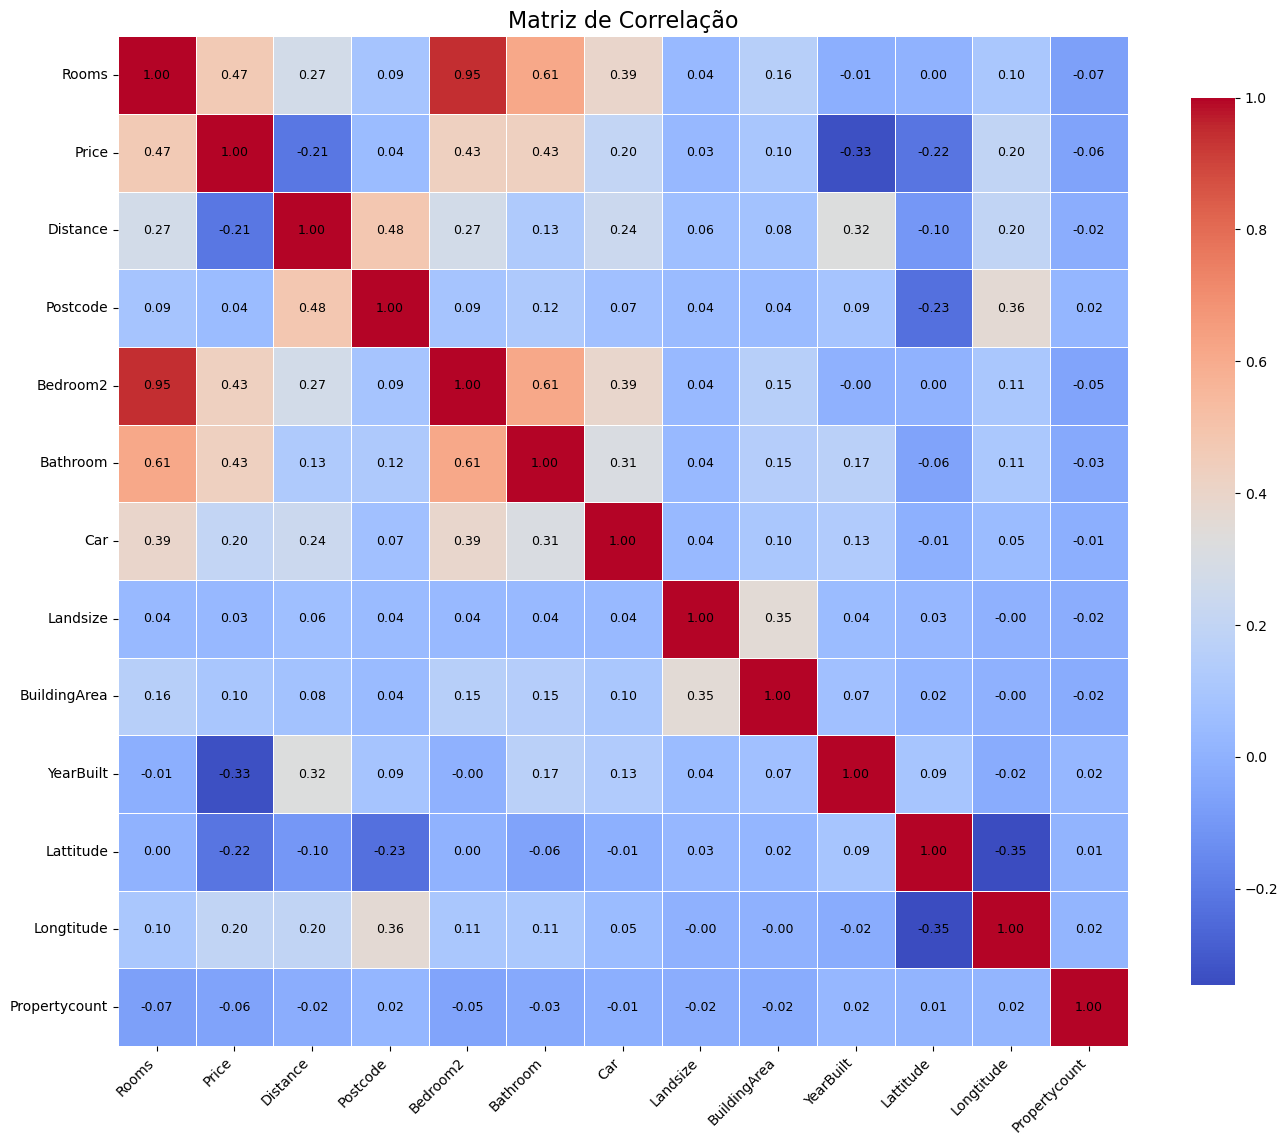

,dtype,missing,valores_unicos,tipo
Suburb,object,0,351,object
Address,object,0,34009,object
Rooms,int64,0,12,int64
Type,object,0,3,object
Price,float64,7610,2871,float64
Method,object,0,9,object
SellerG,object,0,388,object
Date,object,0,78,object
Distance,float64,1,215,float64
Postcode,float64,1,211,float64


In [12]:
# Calculando a matriz de correlação

df_numeric = df[['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']]

correlation_matrix = df_numeric.corr()


plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 9, "color": 'black'} 
)


# Heatmap

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Matriz de Correlação', fontsize=16)
plt.tight_layout()
plt.show()



# Metadados

metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['missing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique() 
metadados['tipo'] = metadados['dtype'].astype(str) 

metadados

## Descobertas

### **Rooms**, **Bedroom2** e **Bathroom** *(Quartos e Banheiros)*

1. Correlação altíssima entre <span style="color: cadetblue;">Rooms</span> e <span style="color: darkseagreen;">Bedroom2</span> (0.94) mostrando que praticamente são variáveis que andam juntas.
   * Sugerindo que uma das variáveis pode ser excluida ou tratada de forma diferente.
    * Isso se da pois ambas as variáveis possuem a mesma informação, apenas de fontes diferentes. <br><br>


2. <span style="color: cadetblue;">Rooms</span> também tem correlação forte com <span style="color:khaki ;">Bathroom</span> (0.61), indicando que o número de quartos é um bom indicador do número de banheiros.

### Price *(Preço de venda/compra)*:

1. <span style="color: cadetblue;">Price</span> tem correlação moderada com <span style="color: darkseagreen;">Rooms</span> (0.46), <span style="color: khaki;">Bedroom2</span> (0.43) e <span style="color: rosybrown;">Bathroom</span> (0.42).
      * Isso mostra que propriedades maiores, com mais quartos e banheiros, tendem a ser mais caras, o que é esperado.<br><br>

2. Curiosamente, <span style="color: cadetblue;">Price</span> tem correlação negativa com <span style="color: mediumorchid;">YearBuilt</span> (-0.33), o que sugere que imóveis mais antigos tendem a ser mais caros.

### Car *(Vagas de carro)*:

* <span style="color: cadetblue;">Car</span> tem correlação baixa a moderada com <span style="color: darkseagreen;">Rooms</span> (0.39) e <span style="color: khaki;">Bathroom</span> (0.30)
    *  o que faz sentido, casas maiores tendem a ter mais vagas. <br><br>

* A correlação com <span style="color: rosybrown;">Building Area</span> (0.10) é bem baixa.
    * Indicando que o tamanho da construção tem pouca influência direta nas vagas de garagem.

### Landsize e BuildingArea *(Tamanho do Terreno e Área Construida)*:

* A correlação entre <span style="color: cadetblue;">Landize</span> e <span style="color: darkseagreen;">BuildingArea</span> é relativamente boa (0.35).
    * como esperado: terrenos maiores tendem a ter construções maiores. <br><br>

* <span style="color: cadetblue;">Landize</span> tem baixíssima correlação com <span style="color: khaki;">Price</span> (0.03).
    * Demonstrando que mostra que tamanho do terreno isoladamente não impacta tanto o preço, o valor pode estar mais associado à:
        1. <span style="color: rosybrown;">Localização</span>,
        2. <span style="color: darkseagreen;">Área Construida</span>,
        3. <span style="color: mediumorchid;">Número de quartos</span>.

### YearBuilt e Distance *(Ano de construção e Distância até o centro da cidade)*:

* <span style="color: cadetblue;">YearBuilt</span> tem correlação moderada com <span style="color: darkseagreen;">Distance</span> (0.32)
    * Mostrando que imóveis mais novos tendem a estar localizados em áreas mais afastadas do centro. <br><br>

* <span style="color: cadetblue;">YearBuilt</span> Correlação negativa com <span style="color: khaki;">Price</span> (-0.33).
    * indica que imóveis mais antigos são mais caros
        * pode ser por estarem em áreas mais centrais ou valorizadas.

### 7. Propertycount (Contagem de propriedades):

* Quase não tem relação significativa com nenhuma variável.
  * Possivelmente, pode ser descartada ou tratada apenas como contexto.

## Problemas encontrados no dataset

### 1: Converter Date para datetime
* Criar a coluna <span style="color: cadetblue;">Ano de Venda</span>
* Criar a coluna <span style="color: cadetblue;">Mês de Venda</span>
      

### 2: Verificar os valores ausentes nas variaveis
1. *Bedroom2*
2. *Bathroom*
3. *Car*
4. *Landsize*
5. *BuildingArea*
6. *YearBuilt*
7. *CouncilArea*
8. *Lattitude*
9. *Longitude*
10. *Regioname*
11. *Propertycount*

 
### 3: Descobrir a Variavel Ausente: <span style="color: cadetblue;">**Price**</span> das casas por meio <span style="color: darkseagreen;">Machine Learning</span>.


### 4: Necessidade de criar novas variáveis 

## Resolução dos problemas

### Ajustes Gerais

* Transformar a variável <span style="color: cadetblue;">Type</span> em *dummies* pois possuem um alto valor

In [31]:
type_mapping = {'h': 0, 'u': 1, 't': 2}
df['Type_numeric'] = df['Type'].map(type_mapping)

### CouncilArea, Regionname, Postcode, Propertycount e Distance

* Ambas possuem apenas 3 valores ausentes possivelmente são da mesma linha.
  - caso sejam: excluiremos a linha.

In [34]:
# Verificando as linhas com valores ausentes em 'CouncilArea', 'Regionname' e 'Propertycount'
missing_rows = df[df[['CouncilArea', 'Regionname', 'Propertycount']].isnull().any(axis=1)]

# Exibindo as linhas com valores ausentes nessas 3 colunas
print(missing_rows)


            Suburb           Address  Rooms Type     Price Method SellerG  \
18523    Footscray  2/16 Stafford St      2    u  710000.0      S     Jas   
26888   Camberwell   2/3 Kingsley St      2    h  825000.0     VB  Jellis   
29483  Fawkner Lot      1/3 Brian St      3    h  616000.0     SP    Brad   

             Date  Distance  Postcode  ...  Car  Landsize  BuildingArea  \
18523  15/07/2017       5.1    3011.0  ...  NaN       NaN           NaN   
26888  11/11/2017       7.7    3124.0  ...  NaN       NaN           NaN   
29483   6/01/2018       NaN       NaN  ...  NaN       NaN           NaN   

       YearBuilt  CouncilArea  Lattitude Longtitude  Regionname  \
18523        NaN          NaN        NaN        NaN         NaN   
26888        NaN          NaN        NaN        NaN         NaN   
29483        NaN          NaN        NaN        NaN         NaN   

       Propertycount Type_numeric  
18523            NaN            1  
26888            NaN            0  
29483        

* As suspeitas eram verdadeiras, excluiremos as linhas do *dataset*.

In [36]:
df = df.dropna(subset=['CouncilArea', 'Regionname', 'Propertycount','Postcode','Distance'], how='any')

### Date

* **Conversão** + criação das variáveis referentes ao <span style="color: cadetblue;">mês</span> e <span style="color: cadetblue;">ano</span> da venda.

In [39]:
# Converter Date para datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Criar coluna do ano da venda
df['Year_Sold'] = df['Date'].dt.year

# Criar coluna do mês da venda
df['Month_Sold'] = df['Date'].dt.month

In [40]:
print(df['Year_Sold'].value_counts().sort_index())
print(df['Month_Sold'].value_counts().sort_index())

Year_Sold
2016    10292
2017    19850
2018     4712
Name: count, dtype: int64
Month_Sold
1      820
2     2642
3     3094
4     1520
5     3416
6     3175
7     2958
8     2888
9     4128
10    3900
11    4386
12    1927
Name: count, dtype: int64


### Bedroom2

*  <span style="color: cadetblue;">Bedroom2</span> e <span style="color: darkseagreen;">Rooms</span> terem a mesma premissa *(número de quartos)* e sendo a unica diferença a fonte de qual foi obtido a informação, iremos dropar a variavel <span style="color: cadetblue;">Bedroom2</span>.


In [43]:
df = df.drop(columns=['Bedroom2'])

### Bathroom

* Para as variaveis missing de <span style="color: cadetblue;">**Bathroom**</span> verificaremos a sua correlação com a quantidade de quartos na casa ( <span style="color: darkseagreen;">Rooms</span> )

In [46]:
df[['Rooms', 'Bathroom']].corr() 

,Rooms,Bathroom
Rooms,1.000000,0.611826
Bathroom,0.611826,1.000000


* Agora, faremos uma <span style="color: khaki;">Regressão linear simples</span> para preencher os valores missings de <span style="color: cadetblue;">Bathroom</span> utilizando a variavel <span style="color: darkseagreen;">Rooms</span> e o <span style="color: khaki;">tipo do imóvel</span> como base.

In [48]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Dados de treino 
df_train = df[df['Bathroom'].notna()]
X_train = df_train[['Rooms', 'Type_numeric']]  
y_train = df_train['Bathroom']

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Prever e arredondar
df_missing = df[df['Bathroom'].isna()]
X_missing = df_missing[['Rooms', 'Type_numeric']]
predicted = model.predict(X_missing)
df.loc[df['Bathroom'].isna(), 'Bathroom'] = np.round(predicted).astype(int)

In [49]:
print('Valores Missing na coluna Bathroom: ',df['Bathroom'].isna().sum())
df[['Rooms', 'Bathroom']].corr()

Valores Missing na coluna Bathroom:  0


,Rooms,Bathroom
Rooms,1.000000,0.656318
Bathroom,0.656318,1.000000


* A correlação entre as variaveis aumentou, o que é um bom sinal.

### Car

In [52]:
df['Car'].value_counts()

Car
2.0     12214
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
18.0        1
12.0        1
Name: count, dtype: int64

* Realizaremos algumas pesquisas no *Dataframe*
  * Média do número de <span style="color: cadetblue;">vagas de carro</span> por <span style="color: darkseagreen;">número de quartos</span>
  * Média do numero de <span style="color: cadetblue;">vagas de carro</span> por <span style="color: khaki;">area construida</span>

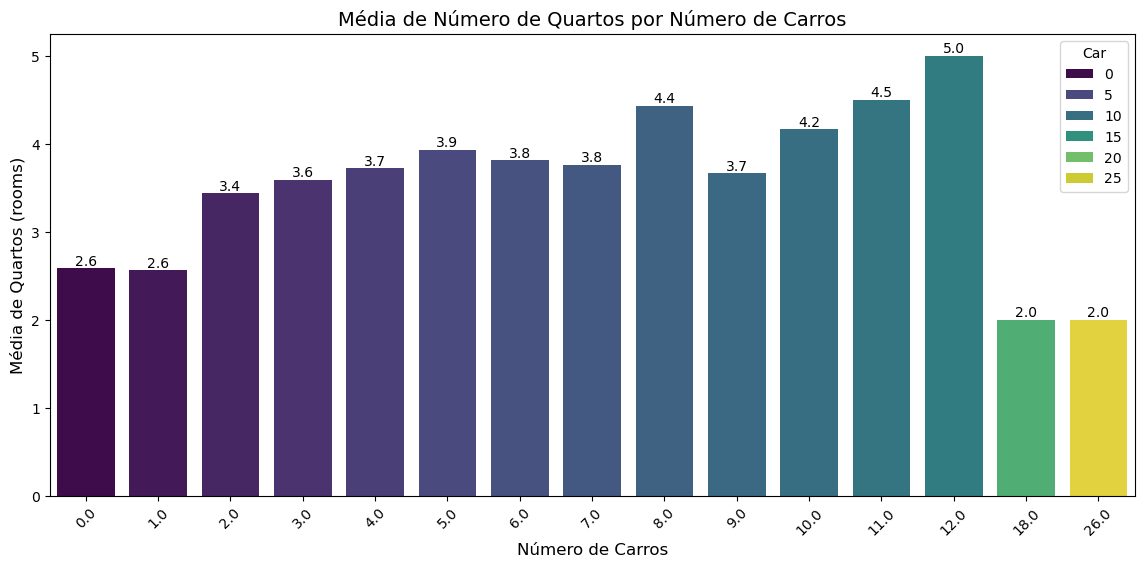

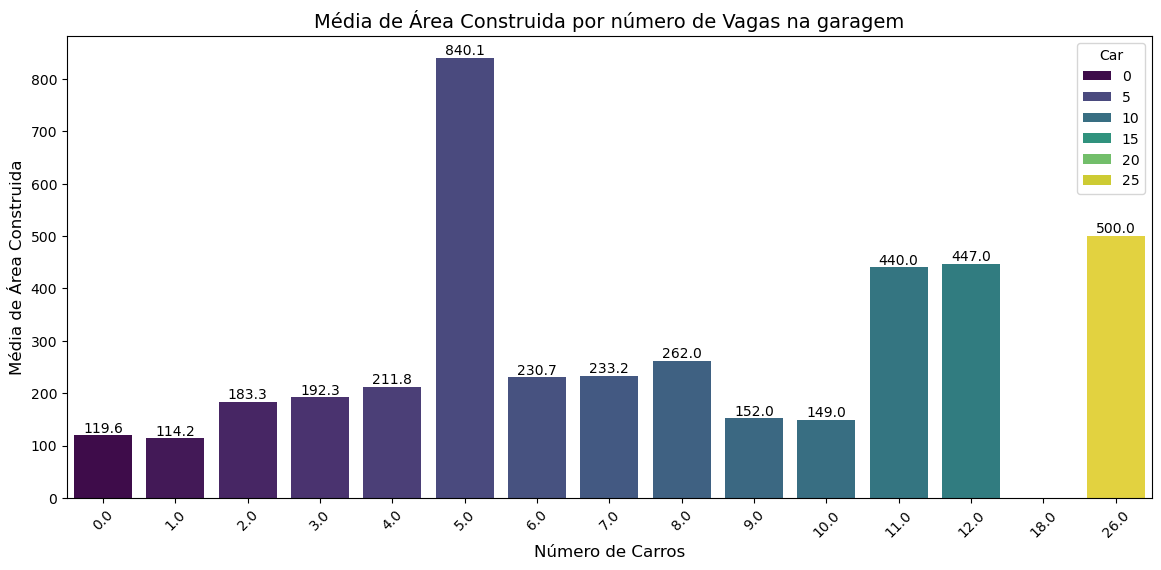

In [54]:
# Rooms - Car

# Calcular a média de 'Rooms' para cada valor de 'Car'
df_grouped = df.groupby('Car')['Rooms'].mean().reset_index()

# Ordenar os valores
df_grouped = df_grouped.sort_values('Car')

# Criar o barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='Car', y='Rooms', data=df_grouped, hue='Car',palette='viridis')
plt.title('Média de Número de Quartos por Número de Carros', fontsize=14)
plt.xlabel('Número de Carros', fontsize=12)
plt.ylabel('Média de Quartos (rooms)', fontsize=12)
plt.xticks(rotation=45)

# Adicionar os valores exatos em cima de cada barra
for index, row in df_grouped.iterrows():
    plt.text(index, row['Rooms'], f"{row['Rooms']:.1f}", 
             ha='center', va='bottom', fontsize=10)

plt.show()




# BuildingArea - Car


# Calcular a média de 'BuildingArea' para cada valor de 'Car'
df_grouped = df.groupby('Car')['BuildingArea'].mean().reset_index()

# Ordenar os valores
df_grouped = df_grouped.sort_values('Car')

# Criar o barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='Car', y='BuildingArea', data=df_grouped, hue='Car', palette='viridis')
plt.title('Média de Área Construida por número de Vagas na garagem', fontsize=14)
plt.xlabel('Número de Carros', fontsize=12)
plt.ylabel('Média de Área Construida', fontsize=12)
plt.xticks(rotation=45)

# Adicionar os valores exatos em cima de cada barra
for index, row in df_grouped.iterrows():
    if pd.notnull(row['BuildingArea']) and np.isfinite(row['BuildingArea']):
        plt.text(index, row['BuildingArea'], f"{row['BuildingArea']:.1f}", 
                 ha='center', va='bottom', fontsize=10)

plt.show()


**Descobertas**

* <span style="color: cadetblue;">Car</span> e <span style="color: darkseagreen;">Rooms</span> aparentam ter uma relação melhor que <span style="color: cadetblue;">Car</span> e <span style="color: khaki;">BuildingArea</span>. o que vimos anteriormente pela *matriz de correlação*

* Parece ter um *outlier* onde o valor de <span style="color: cadetblue;">Car</span> é <span style="color: cadetblue;">5</span>

* Os valores onde <span style="color: cadetblue;">Car</span> é <span style="color: cadetblue;">18</span> ou <span style="color: cadetblue;">26</span> parecem ter sido imputados errados, possuindo muitas vagas, uma <span style="color: khaki;">area construida</span> que não condiz com as <span style="color: cadetblue;">vagas</span > ou com a <span style="color: darkseagreen;">Quantidade de quartos</span>

* Os valores onde <span style="color: cadetblue;">Car</span> é <span style="color: cadetblue;">9</span> ou <span style="color: cadetblue;">10</span>
parecem levemente fora da curva, mas podem ter alguns fatores:

    * Em muitos casos, um <span style="color: darkseagreen;">número maior de quartos</span> pode estar associado a uma <span style="color: khaki;">área maior</span>, mas não de forma linear. Por exemplo, algumas casas podem ter quartos menores, mas ainda assim ocuparem uma grande área devido a outros fatores, como a disposição do espaço ou presença de áreas de lazer, garagem, etc.
      
    * **Imóveis diferentes:** Mesmo com um <span style="color: darkseagreen;">número médio de quartos</span> relativamente alto, a <span style="color: khaki;">área construída</span> pode ser impactada por imóveis que possuam características específicas, como jardins grandes, pátios, ou áreas adicionais (como varandas ou corredores largos), que aumentam a área total sem necessariamente refletir no número de quartos.
 

**Ações que serão tomadas**

* Exclusão de outliers e imputações irregulares.
  * O outlier visto em que o valor de <span style="color: cadetblue;">Car</span> é <span style="color: cadetblue;">5</span> será excluido do *dataframe*
  * as duas imputações irregulares serão excluidas. ( <span style="color: cadetblue;">Car</span> é igual <span style="color: cadetblue;">18</span> ou <span style="color: cadetblue;">26</span> ) <br><br>

* Será atribuido aos *valores ausentes* uma média da variavel <span style="color: cadetblue;">Car</span> tendo como base a variavel <span style="color: darkseagreen;">Rooms</span>. em seguida será arredondando para baixo para evitar números não inteiros que possam aparecer enquanto geramos a média.

In [56]:
df = df[~df['Car'].isin([18, 26])]


# Outlier BuildingArea Car = 5
df_car_5 = df[df['Car'] == 5]
max_building_area = df_car_5['BuildingArea'].max()
df = df[~((df['Car'] == 5) & (df['BuildingArea'] == max_building_area))]

In [57]:
# Ordenar os valores da coluna 'Car' em ordem crescente
df['Car'].value_counts()

Car
2.0     12214
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       150
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
12.0        1
Name: count, dtype: int64

* Vamos então calcular a **mediana** da variável <span style="color: cadetblue;">Car</span> agrupando pela variável <span style="color: darkseagreen;">Rooms</span> e pelo <span style="color: khaki;">tipo do imóvel</span>.

In [59]:
# Calcular a mediana por 'Rooms' e 'Type'
median_by_rooms_type = df.groupby(['Rooms', 'Type_numeric'])['Car'].median().reset_index()
median_by_rooms_type.rename(columns={'Car': 'Car_median'}, inplace=True)

# Mesclar com o DataFrame original
df = df.merge(median_by_rooms_type, on=['Rooms', 'Type_numeric'], how='left')

# Preencher missings e arredondar
df['Car'] = df.apply(
    lambda row: np.floor(row['Car_median']) if pd.isnull(row['Car']) else row['Car'],
    axis=1
)

# Remover coluna auxiliar
df.drop(columns=['Car_median'], inplace=True)

In [60]:
df['Car'].isnull().sum()  

1

* Sobrou apenas um valor faltante no qual iremos excluir a linha

In [62]:
df = df.dropna(subset=['Car'])

In [63]:
df[['Car','Rooms', 'BuildingArea','Type_numeric']].corr()  

,Car,Rooms,BuildingArea,Type_numeric
Car,1.000000,0.448079,0.235785,-0.211678
Rooms,0.448079,1.000000,0.423887,-0.365013
BuildingArea,0.235785,0.423887,1.000000,-0.164102
Type_numeric,-0.211678,-0.365013,-0.164102,1.000000


* A variável <span style="color: cadetblue;">Car</span> não apresenta mais valores nulos e a sua *correlação* com as demais variaveis demonstrou um aumento relevante.

### YearBuilt

In [66]:
print(df['YearBuilt'].min())
print(df['YearBuilt'].max())

1196.0
2106.0


In [67]:
# Calculando o IQR para YearBuilt
Q1 = df['YearBuilt'].quantile(0.25)
Q3 = df['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrando os outliers
outliers = df[(df['YearBuilt'] < lower_bound) | (df['YearBuilt'] > upper_bound)]

# Verificando os outliers
print(outliers[['YearBuilt']])
df['YearBuilt'].unique()

       YearBuilt
2453      2106.0
3533      1830.0
13654     1800.0
16423     1196.0
25759     1820.0


array([  nan, 1900., 2014., 2006., 1910., 2009., 1860., 1890., 1925.,
       2005., 2010., 1880., 1985., 1970., 2013., 2012., 1920., 1950.,
       1998., 1930., 2016., 1965., 1960., 1980., 2011., 2015., 1975.,
       1993., 2003., 1995., 1996., 2000., 1990., 1915., 2004., 2008.,
       1916., 1962., 1955., 1988., 1953., 1997., 2007., 1967., 1964.,
       1889., 1888., 1934., 1966., 1935., 1969., 1940., 1938., 1887.,
       1904., 1972., 1978., 1939., 1945., 1927., 1948., 1947., 1968.,
       1958., 2017., 1999., 1992., 1961., 1928., 1977., 1919., 1976.,
       2001., 1926., 1981., 1986., 1943., 1974., 1956., 1936., 1957.,
       1987., 2002., 1952., 1994., 1949., 1905., 1912., 1924., 1885.,
       1923., 1918., 1991., 1942., 1973., 2018., 1982., 2106., 1971.,
       1963., 1931., 1897., 1906., 1883., 1989., 1983., 1937., 1903.,
       1913., 1830., 1895., 1908., 1917., 1902., 1854., 1850., 1898.,
       1941., 1951., 1946., 1984., 1901., 1921., 1929., 1959., 1979.,
       1892., 1933.,

* De cara nos debatemos com 2 *outliers* na variável <span style="color: cadetblue;">BuiltYear</span>, contudo podemos perceber que são apenas esses 2 valores que estão desconexos.
    * Possivelmente foi uma *falha humana* na hora de colocar os valores, ou no **dataset** ou no **site responsável**. 
    * Pois podemos ver que se inverter os valores do centro, se torna um valor dentro do previsto (**1916 e 2016**)
      * Demonstrando mais ainda uma possível *falha humana*.



In [69]:
# Filtrando as linhas onde YearBuilt é igual aos outliers específicos
outliers_stranhos = df[(df['YearBuilt'] == 1196) | (df['YearBuilt'] == 2106)]

# Exibindo as linhas com os outliers
print(outliers_stranhos)


               Suburb         Address  Rooms Type      Price Method  SellerG  \
2453          Bulleen    3 Maringa St      4    h        NaN     SP      Ray   
16423  Mount Waverley  5 Armstrong St      3    h  1200000.0     VB  McGrath   

            Date  Distance  Postcode  ...  BuildingArea  YearBuilt  \
2453  2016-11-07      11.8    3105.0  ...         255.0     2106.0   
16423 2017-06-24      14.2    3149.0  ...         117.0     1196.0   

                   CouncilArea  Lattitude  Longtitude            Regionname  \
2453   Manningham City Council  -37.76370   145.08810  Eastern Metropolitan   
16423      Monash City Council  -37.86788   145.12121  Eastern Metropolitan   

       Propertycount  Type_numeric Year_Sold  Month_Sold  
2453          4480.0             0      2016          11  
16423        13366.0             0      2017           6  

[2 rows x 23 columns]


In [70]:
# Substituindo os valores 1196 por 1916 e 2106 por 2016 na coluna 'YearBuilt_range'
df['YearBuilt'] = df['YearBuilt'].replace({1196.0: 1916.0, 2106.0: 2016.0})

# Verificando se a substituição foi feita corretamente
print(df['YearBuilt'].unique())

[  nan 1900. 2014. 2006. 1910. 2009. 1860. 1890. 1925. 2005. 2010. 1880.
 1985. 1970. 2013. 2012. 1920. 1950. 1998. 1930. 2016. 1965. 1960. 1980.
 2011. 2015. 1975. 1993. 2003. 1995. 1996. 2000. 1990. 1915. 2004. 2008.
 1916. 1962. 1955. 1988. 1953. 1997. 2007. 1967. 1964. 1889. 1888. 1934.
 1966. 1935. 1969. 1940. 1938. 1887. 1904. 1972. 1978. 1939. 1945. 1927.
 1948. 1947. 1968. 1958. 2017. 1999. 1992. 1961. 1928. 1977. 1919. 1976.
 2001. 1926. 1981. 1986. 1943. 1974. 1956. 1936. 1957. 1987. 2002. 1952.
 1994. 1949. 1905. 1912. 1924. 1885. 1923. 1918. 1991. 1942. 1973. 2018.
 1982. 1971. 1963. 1931. 1897. 1906. 1883. 1989. 1983. 1937. 1903. 1913.
 1830. 1895. 1908. 1917. 1902. 1854. 1850. 1898. 1941. 1951. 1946. 1984.
 1901. 1921. 1929. 1959. 1979. 1892. 1933. 1911. 1886. 1876. 1907. 1881.
 1870. 1932. 1875. 1863. 1893. 1856. 1877. 1894. 1857. 1914. 1868. 1884.
 1872. 1954. 1922. 1896. 1800. 1909. 1891. 1862. 1871. 1899. 1820. 1869.
 1855. 2019. 1879.]


* As linhas com os *outliers* que vimos antes pareciam dentro da normalidade, apenas inverteremos os digitos centrais.

In [72]:
df['YearBuilt'] = df.groupby('Regionname')['YearBuilt'].transform(
    lambda x: x.fillna(x.median())
)
print(df['YearBuilt'].unique())
print("\nValores Ausentes em YearBuilt",df['YearBuilt'].isna().sum())

[1970. 1900. 2014. 2006. 1910. 2009. 1860. 1890. 1925. 2005. 2010. 1880.
 1985. 2013. 2012. 1920. 1950. 1998. 1930. 2016. 1965. 1960. 1980. 2011.
 1977. 2015. 1975. 1993. 2003. 1995. 1996. 2000. 1990. 1915. 2004. 2008.
 1916. 1962. 1955. 1988. 1953. 1997. 2007. 1967. 1964. 1889. 1888. 1934.
 1966. 1935. 1969. 1940. 1938. 1887. 1904. 1972. 1978. 1939. 1945. 1927.
 1948. 1947. 1968. 1958. 2017. 1999. 1992. 1961. 1928. 1919. 1976. 2001.
 1926. 1981. 1986. 1943. 1974. 1956. 1936. 1957. 1987. 2002. 1952. 1994.
 1949. 1905. 1912. 1924. 1885. 1923. 1918. 1991. 1942. 1973. 2018. 1982.
 1971. 1963. 1931. 1897. 1906. 1883. 1989. 1983. 1937. 1903. 1913. 1830.
 1895. 1908. 1917. 1902. 1854. 1850. 1898. 1941. 1951. 1946. 1984. 1901.
 1921. 1929. 1959. 1979. 1892. 1933. 1911. 1886. 1876. 1907. 1881. 1870.
 1932. 1875. 1863. 1893. 1856. 1877. 1894. 1857. 1914. 1868. 1884. 1872.
 1954. 1922. 1896. 1800. 1909. 1891. 1862. 1871. 1899. 1820. 1869. 1855.
 2019. 1879.]

Valores Ausentes em YearBuilt 0


**Para os valores ausentes:**

* Imputamos a mediana de <span style="color: cadetblue;">YearBuilt</span> com base na <span style="color: darkseagreen;">Região</span> correspondente;

  * isso porque, geralmente, durante o processo de *loteamento e urbanização acelerada*, as construções residenciais e comerciais surgem em conjunto, fazendo com que as edificações de uma mesma região tenham idades semelhantes.

### BuildingArea

In [75]:
# Verificando a distribuição de valores ausentes

print(f"\nBuildingArea ausente: {df['BuildingArea'].isna().mean()*100:.2f}%")
print(df['BuildingArea'].describe())


BuildingArea ausente: 60.57%
count    13740.000000
mean       157.003526
std        133.512707
min          0.000000
25%        102.000000
50%        136.000000
75%        188.000000
max       6791.000000
Name: BuildingArea, dtype: float64


* <span style="color: cadetblue;">BuildingArea</span> se mostrou uma variável complicada, pois 60% dos seus dados estão faltando.
  * Assim, separaremos as possiveis variáveis para realizar uma *Regressão RandomForest*
    - *Rooms*
    - *Bathroom*
    - *Car*
    - *YearBuilt*
    - *Type*
    - *Distance* <br><br>
 
* Não utilizaremos a variável <span style="color: darkseagreen;">Landsize</span> pois queremos explicar a mesma utilizando da <span style="color: cadetblue;">BuildingArea</span>.

In [77]:
# Preparar dados para modelo
non_missing = df.dropna(subset=['BuildingArea'])
missing = df[df['BuildingArea'].isna()]

# Features relevantes (incluindo Type_numeric em vez de Type)
features = ['Rooms', 'Bathroom', 'Car', 'YearBuilt', 'Type_numeric', 'Distance']

# DataFrames de treino e predição (sem get_dummies)
X_train = non_missing[features]
X_pred = missing[features]

# Verificar se há dados suficientes para o modelo
if len(non_missing) > 100 and not X_pred.empty:
    model = RandomForestRegressor(n_estimators=50, random_state=42)
    model.fit(X_train, non_missing['BuildingArea'])
    df.loc[missing.index, 'BuildingArea'] = model.predict(X_pred)

# Flag de imputação
df['BuildingArea_imputed'] = df['BuildingArea'].isna()

# Verificação final
print(f"\nBuildingArea ausente após tratamento: {df['BuildingArea'].isna().mean()*100:.2f}%")
print("\nDistribuição dos valores imputados:")
print(df.groupby('Type')['BuildingArea'].describe())


BuildingArea ausente após tratamento: 0.00%

Distribuição dos valores imputados:
        count        mean         std  min         25%         50%  \
Type                                                                 
h     23975.0  171.328793  105.006949  0.0  120.573667  152.610000   
t      3579.0  156.556659  257.274962  0.0   96.198000  125.460000   
u      7296.0   83.382410   45.162032  0.0   61.000000   75.525333   

             75%     max  
Type                      
h     200.000000  6791.0  
t     164.186667  6178.0  
u      96.000000  1561.0  


### Landsize

In [79]:
# Imputação hierárquica por grupos relevantes

df['Landsize'] = df.groupby([
    'Type_numeric',      
    'Regionname',        
    'Rooms'              
])['Landsize'].transform(lambda x: x.fillna(x.median()))

# Modelo preditivo para casos restantes (se necessário)
if df['Landsize'].isna().sum() > 0:
    from sklearn.ensemble import RandomForestRegressor
    
    # Definir features relevantes para Landsize
    landsize_features = ['BuildingArea', 'Rooms', 'Type_numeric', 'Distance', 'Propertycount']
    
    # Filtrar dados completos para treino
    landsize_non_missing = df.dropna(subset=['Landsize'] + landsize_features)
    landsize_missing = df[df['Landsize'].isna() & df[landsize_features].notna().all(axis=1)]
    
    if len(landsize_non_missing) > 50 and not landsize_missing.empty:
        X_train = landsize_non_missing[landsize_features]
        y_train = landsize_non_missing['Landsize']
        X_pred = landsize_missing[landsize_features]
        
        model = RandomForestRegressor(n_estimators=250, random_state=27)
        model.fit(X_train, y_train)
        df.loc[landsize_missing.index, 'Landsize'] = model.predict(X_pred)

# Flag de imputação e verificação
df['Landsize_imputed'] = df['Landsize'].isna()
print(f"\nLandsize ausente após tratamento: {df['Landsize'].isna().mean()*100:.2f}%")
print("\nEstatísticas descritivas por tipo de propriedade:")
print(df.groupby('Type')['Landsize'].describe())


Landsize ausente após tratamento: 0.00%

Estatísticas descritivas por tipo de propriedade:
        count        mean          std  min    25%    50%    75%       max
Type                                                                      
h     23975.0  619.627665  3247.369724  0.0  420.0  572.0  669.0  433014.0
t      3579.0  250.480555   482.341603  0.0  140.0  213.5  268.5   15900.0
u      7296.0  275.849713  1225.467291  0.0    0.0    0.0  183.5   37000.0


In [80]:
pd.set_option('display.max_columns', None)
df.sort_values(by='Landsize', ascending=False).head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Type_numeric,Year_Sold,Month_Sold,BuildingArea_imputed,Landsize_imputed
18035,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,2017-08-12,2.1,3065.0,3.0,1.0,433014.0,188.474000,1970.0,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0,0,2017,8,False,False
26864,Bullengarook,65 Webb Rd,4,h,1050000.0,PI,Raine,2017-11-11,45.9,3437.0,2.0,1.0,146699.0,159.980000,2000.0,Macedon Ranges Shire Council,-37.47540,144.51300,Northern Victoria,249.0,0,2017,11,False,False
24797,Wildwood,430 Wildwood Rd,5,h,1030000.0,S,RE,2017-10-14,31.7,3429.0,2.0,2.0,89030.0,83.240000,1977.0,Hume City Council,-37.60400,144.80604,Western Metropolitan,83.0,0,2017,10,False,False
32571,Diggers Rest,55 Morefield Ct,4,h,NaN,PI,Brad,2018-02-17,27.7,3427.0,2.0,2.0,80000.0,193.946667,1977.0,Hume City Council,-37.64310,144.75269,Western Metropolitan,1184.0,0,2018,2,False,False
17292,Silvan,16 Eleanor Dr,3,h,1085000.0,S,Harcourts,2017-05-27,34.6,3795.0,2.0,2.0,76000.0,146.885714,1986.0,Yarra Ranges Shire Council,-37.84739,145.47052,Eastern Victoria,457.0,0,2017,5,False,False


### Latitude e Longitude

In [82]:
print(f"Latitude ausente: {df['Lattitude'].isna().mean()*100:.2f}%")
print(f"Longitude ausente: {df['Longtitude'].isna().mean()*100:.2f}%")

Latitude ausente: 22.88%
Longitude ausente: 22.88%


* Como menos de **$\dfrac{1}{4}$** do **Dataset** possui valores ausentes para <span style="color: cadetblue;">latitude</span> e <span style="color: darkseagreen;">longitude</span> utilizaremos de outra maneira para preencher os valores.

*  Utilizaremos a média das <span style="color: cadetblue;">coordenadas</span> das casas que se encontram na <span style="color: khaki;">mesma rua *(adress)*</span>  para preencher os valores.
    * Caso não tenha nenhuma casa na rua com os valores preenchidos, utilizaremos a <span style="color: rosybrown;">média da região</span>.

In [84]:
if df['Lattitude'].isna().any() or df['Longtitude'].isna().any():
    # Preenche primeiro por endereço exato (se houver outros registros com mesmo endereço)
    df['Lattitude'] = df.groupby('Address')['Lattitude'].transform(
        lambda x: x.fillna(x.median()))
    df['Longtitude'] = df.groupby('Address')['Longtitude'].transform(
        lambda x: x.fillna(x.median()))
    
    # Para os restantes, preenche pela mediana da região
    df['Lattitude'] = df.groupby('Regionname')['Lattitude'].transform(
        lambda x: x.fillna(x.median()))
    df['Longtitude'] = df.groupby('Regionname')['Longtitude'].transform(
        lambda x: x.fillna(x.median()))

In [85]:
print("\nValores ausentes remanescentes:")
print(f"Latitude: {df['Lattitude'].isna().sum()}")
print(f"Longitude: {df['Longtitude'].isna().sum()}")


Valores ausentes remanescentes:
Latitude: 0
Longitude: 0


In [86]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['missing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique() 
metadados['tipo'] = metadados['dtype'].astype(str) 

metadados


,dtype,missing,valores_unicos,tipo
Suburb,object,0,350,object
Address,object,0,34002,object
Rooms,int64,0,12,int64
Type,object,0,3,object
Price,float64,7608,2871,float64
Method,object,0,9,object
SellerG,object,0,388,object
Date,datetime64[ns],0,78,datetime64[ns]
Distance,float64,0,215,float64
Postcode,float64,0,211,float64


### Ajustes Adicionais

* Adicionaremos as seguintes colunas para nos ajudar na regressão e no futuro:
  * <span style="color: cadetblue;">Preço por m²</span>
  * <span style="color: darkseagreen;">Densidade de quartos por m²</span>
  * <span style="color: khaki;">Idade do imóvel</span>

*Após a regressão ser feita, faremos o ajuste novamente para os valores de <span style="color: rosybrown;">Price</span> atualizados*

In [89]:
# 1. Preço por m² (ajustado para BuildingArea > 0)
df['Price_per_sqm'] = np.where(
    df['BuildingArea'] > 0,
    df['Price'] / df['BuildingArea'],
    np.nan  
)

# 2. Densidade de quartos por m² (ajustado para BuildingArea > 0)
df['Rooms_per_sqm'] = np.where(
    df['BuildingArea'] > 0,
    df['Rooms'] / df['BuildingArea'],
    np.nan
)

# 3. Idade do imóvel (assumindo que YearBuilt está disponível)
if 'YearBuilt' in df.columns:
    df['PropertyAge'] = 2025 - df['YearBuilt']  # Atualize o ano conforme necessário

df['Regionname_numeric'] = df['Regionname'].astype('category').cat.codes

df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Type_numeric', 'Year_Sold',
       'Month_Sold', 'BuildingArea_imputed', 'Landsize_imputed',
       'Price_per_sqm', 'Rooms_per_sqm', 'PropertyAge', 'Regionname_numeric'],
      dtype='object')

### Price *(variavel Alvo)*

* **GridSearch + Regressão**

Fitting 3 folds for each of 24 candidates, totalling 72 fits

=== MELHORES PARÂMETROS ===
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}

=== DESEMPENHO ===
MAE: 30072.44
R²: 0.97


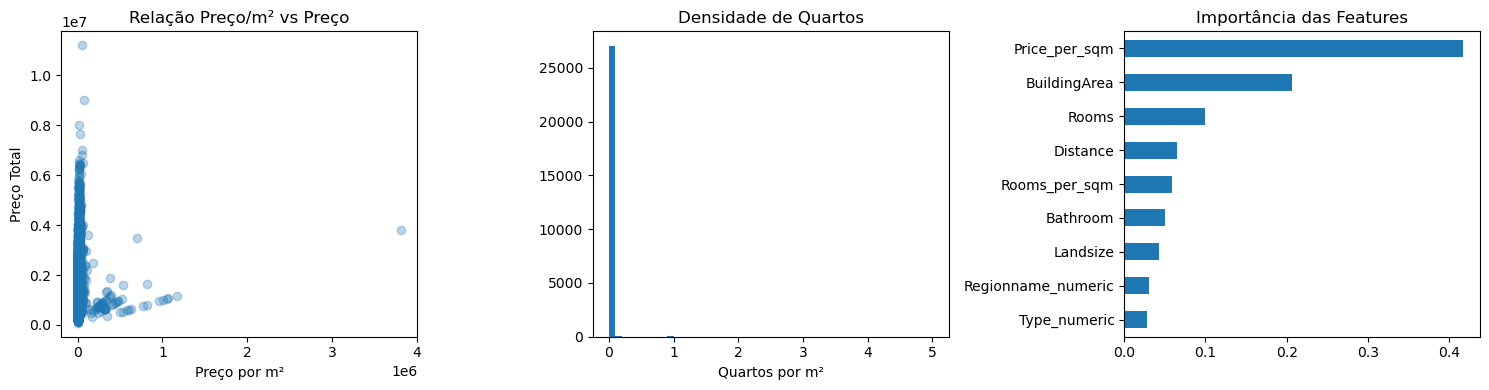

CPU times: total: 1min 13s
Wall time: 57.2 s


In [92]:
%%time

# Features atualizadas (incluindo as novas)
features = [
    'Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
    'Type_numeric', 'Distance', 'Regionname_numeric',
    'Price_per_sqm', 'Rooms_per_sqm'
]

# Remover linhas com valores infinitos ou NaN nas novas features
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna(subset=features + ['Price'])

# Divisão - teste - treino
X = df_clean[features]
y = df_clean['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Remover outliers (preços extremos)
price_q99 = df['Price'].quantile(0.99)
df_train = df_clean[df_clean['Price'] < price_q99]

# Gridsearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=27, n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X_train, y_train)

# Avaliação
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== MELHORES PARÂMETROS ===")
print(grid_search.best_params_)
print("\n=== DESEMPENHO ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")



# Gráficos para melhor entendimento
plt.figure(figsize=(15, 4))

# Relação entre Price_per_sqm e Price
plt.subplot(1, 3, 1)
plt.scatter(df_clean['Price_per_sqm'], df_clean['Price'], alpha=0.3)
plt.xlabel('Preço por m²')
plt.ylabel('Preço Total')
plt.title('Relação Preço/m² vs Preço')

# Distribuição de Rooms_per_sqm
plt.subplot(1, 3, 2)
plt.hist(df_clean['Rooms_per_sqm'].dropna(), bins=50)
plt.xlabel('Quartos por m²')
plt.title('Densidade de Quartos')

# Importância das Features
plt.subplot(1, 3, 3)
importances = pd.Series(best_rf.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')
plt.title('Importância das Features')

plt.tight_layout()
plt.show()

* Validação Cruzada

In [94]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R² Validação Cruzada: {scores.mean():.2f} (±{scores.std():.2f})")

R² Validação Cruzada: 0.99 (±0.01)


* **Imputação dos valores no dataset**

In [96]:
# Verificação Inicial
print("Valores ausentes ANTES: ",df['Price'].isna().sum())


# Identificar linhas com Price ausente (mesmo que algumas features estejam NaN)
missing_price_mask = df['Price'].isna()

if missing_price_mask.any():
    df_filled = df[features].copy()
    for col in features:
        if df_filled[col].isna().any():
            df_filled[col] = df_filled[col].fillna(df_filled[col].median())
    
   
    # Fazer previsões para TODOS os Price ausentes
    df.loc[missing_price_mask, 'Price'] = best_rf.predict(df_filled[missing_price_mask])
    
   
    # Flag de imputação
    df['Price_imputed'] = missing_price_mask
    
    print("Valores imputados:", missing_price_mask.sum())
else:
    print("Nenhum valor ausente para imputar.")

# Verificação Final
print(f"\nValores ausentes DEPOIS: {df['Price'].isna().sum()}")
print("\nEstatísticas atualizadas:")
print(df['Price'].describe())
df['Price'].isna().sum()

Valores ausentes ANTES:  7608
Valores imputados: 7608

Valores ausentes DEPOIS: 0

Estatísticas atualizadas:
count    3.485000e+04
mean     1.067347e+06
std      6.167362e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.068096e+05
75%      1.315046e+06
max      1.120000e+07
Name: Price, dtype: float64


0

* Refazendo as variaveis:
  * <span style="color: cadetblue;">Preço por m²</span>
  * <span style="color: darkseagreen;">Densidade de quartos por m²</span>
  * <span style="color: khaki;">Idade do imóvel</span>

*Agora com <span style="color: rosybrown;">Price</span> sem valores ausentes*

In [98]:
# Refazendo as variaveis, agora com Price Correto
df['BuildingArea'] = df.groupby('Type')['BuildingArea'].transform(
    lambda x: x.fillna(x.median())
)

# Substituir BuildingArea = 0 pela mediana (para evitar divisão por zero)
df['BuildingArea'] = np.where(
    df['BuildingArea'] == 0,
    df.groupby('Type')['BuildingArea'].transform('median'),
    df['BuildingArea']
)




# Preço por m² (agora sem NaN, pois BuildingArea está tratado)
df['Price_per_sqm'] = df['Price'] / df['BuildingArea']

# Densidade de quartos por m²
df['Rooms_per_sqm'] = df['Rooms'] / df['BuildingArea']

# Idade do imóvel (se YearBuilt existir)
if 'YearBuilt' in df.columns:
    df['PropertyAge'] = 2025 - df['YearBuilt']  # Ajuste o ano atual
    

df['Regionname_numeric'] = df['Regionname'].astype('category').cat.codes

df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Type_numeric', 'Year_Sold',
       'Month_Sold', 'BuildingArea_imputed', 'Landsize_imputed',
       'Price_per_sqm', 'Rooms_per_sqm', 'PropertyAge', 'Regionname_numeric',
       'Price_imputed'],
      dtype='object')

# Avaliações pós tratamento de dados

## Pontos Fortes

* Altíssima Precisão

    * <span style="color: cadetblue;">R²</span> de <span style="color: cadetblue;">0.97/0.99</span> está bem acima do baseline **(0.90)**, indicando que o modelo captura quase toda a complexidade do mercado.
    
    * <span style="color: darkseagreen;">MAE</span> baixo em relação à escala de preços (apenas ~2.7% de erro médio).

* Parâmetros Otimizados

    * <span style="color: cadetblue;">max_depth=20</span>: Profundidade adequada para capturar relações não-lineares sem overfitting.
    
    * <span style="color: darkseagreen;">n_estimators=200</span>: Número suficiente de árvores para estabilizar as previsões.

* Robustez

    * Baixo <span style="color: cadetblue;">desvio padrão</span> na <span style="color: cadetblue;">validação cruzada</span> **(±0.01)** mostra que o desempenho é consistente em diferentes subsets de dados.

## Possíveis Riscos e Verificações

* Overfitting?

    * Apesar do <span style="color: cadetblue;">R²</span>, o <span style="color: darkseagreen;">MAE</span> baixo e a <span style="color: khaki;">validação cruzada</span> consistente descartam **overfitting**.

* Impacto de Outliers

    * O <span style="color: cadetblue;">MAE</span> pode ser influenciado por imóveis de luxo.

## Matriz de Correlação e Metadados (atualizados)

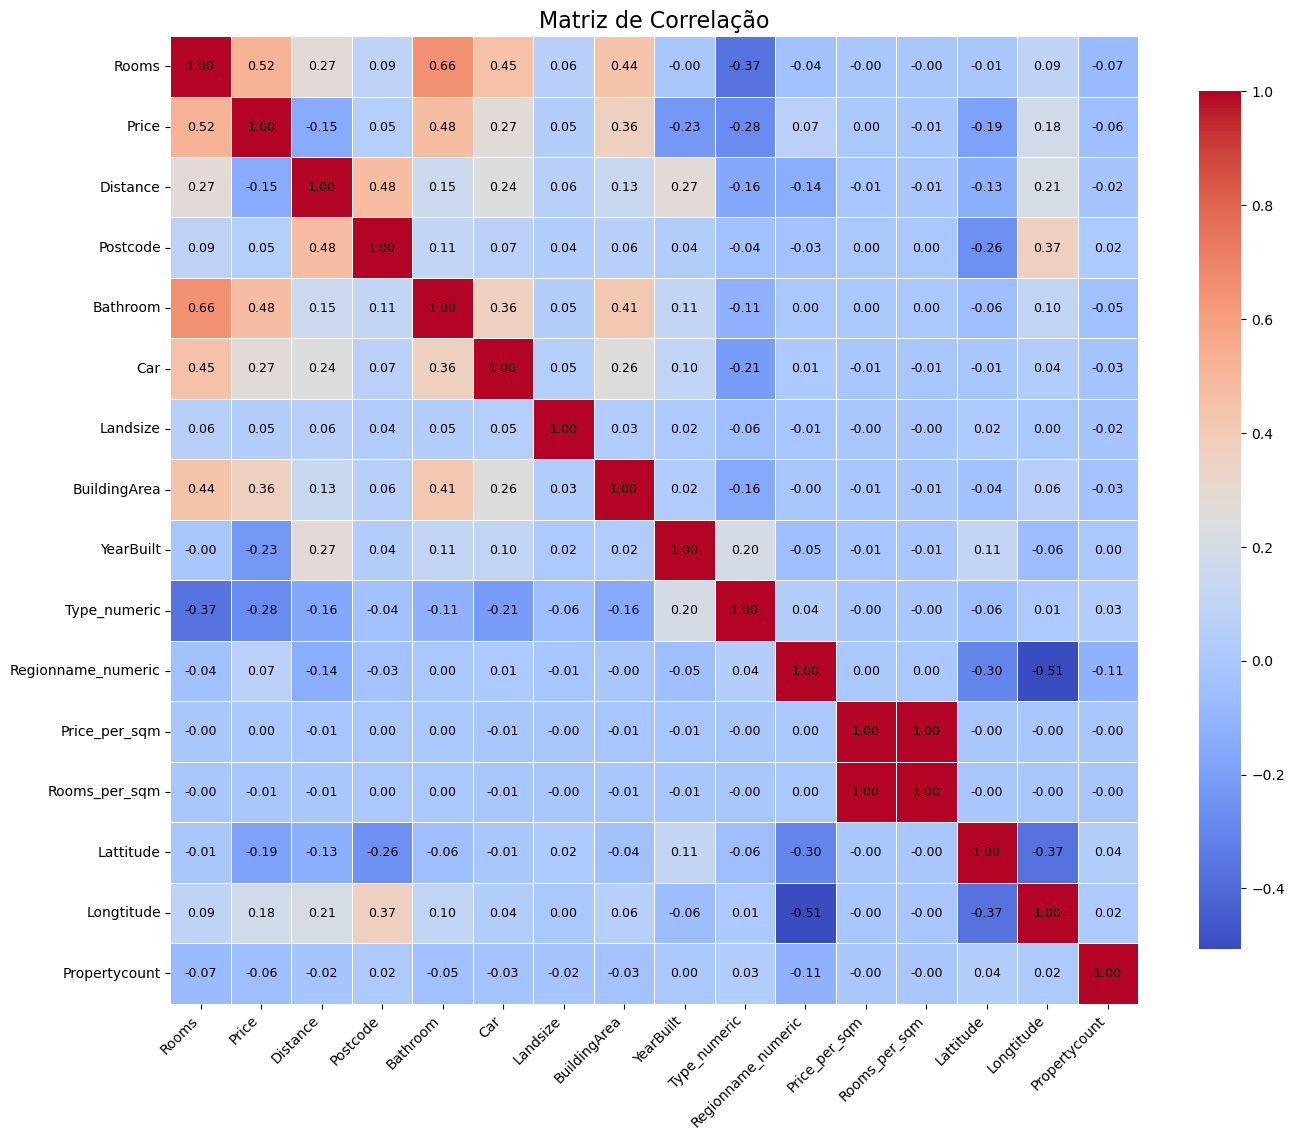

,dtype,missing,valores_unicos,tipo
Suburb,object,0,350,object
Address,object,0,34002,object
Rooms,int64,0,12,int64
Type,object,0,3,object
Price,float64,0,9330,float64
Method,object,0,9,object
SellerG,object,0,388,object
Date,datetime64[ns],0,78,datetime64[ns]
Distance,float64,0,215,float64
Postcode,float64,0,211,float64


In [105]:
# Calculando a matriz de correlação

df_numeric = df[['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt','Type_numeric','Regionname_numeric',
    'Price_per_sqm', 'Rooms_per_sqm', 'Lattitude', 'Longtitude', 'Propertycount']]

correlation_matrix = df_numeric.corr()


plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 9, "color": 'black'} 
)


# Heatmap

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Matriz de Correlação', fontsize=16)
plt.tight_layout()
plt.show()



# Metadados

metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['missing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique() 
metadados['tipo'] = metadados['dtype'].astype(str) 

metadados

* Tanto a <span style="color: cadetblue;">Matriz de Correlação</span> quanto o <span style="color: darkseagreen;">metadados</span> apresentam agora muito mais variaveis e estão muito mais robustos.
    * A <span style="color: cadetblue;">Matriz de Correlação</span> já apresenta correlações muito mais fortes.
    * O <span style="color: darkseagreen;">metadados</span> já não apresenta valores missings e possui muito mais opções para trabalhar.

---
* Salvar o dataframe, por garantia.

In [107]:
df.to_csv('dados_com_precos_imputados.csv', index=False)

# Streamlit e aplicações

In [109]:
# Opcional: Salvar o DataFrame atualizado
df.to_csv('dados_com_precos_imputados.csv', index=False)